# NLP Project 1 - Statistical NLP Project
## Author: Abhinav Roy
### Date - 20/05/2023

In [ ]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline
import missingno as msno
import random
import re

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *
from scipy.spatial.distance import cdist
from math import *
'''
!pip install pandasql
import pandasql as psql
from pandasql import sqldf
'''
import string
alphabet = string.ascii_letters+string.punctuation

from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import time
from datetime import datetime

from collections import Counter

import pickle
import joblib

import warnings # ignore warnings
warnings.filterwarnings("ignore")

In [ ]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import *
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, learning_curve
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.ensemble import *
#!pip install catboost
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# install and import SMOTE module from imblearn library
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE

#!pip install eli5
#import eli5

In [ ]:
# import Neural Network libraries
import tensorflow 
print(tensorflow.__version__)

from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import *
from keras.models import Sequential # Forward prop
#from keras.layers import Dense, Activation, Dropout, BatchNormalization, LayerNormalization, SwitchableNormalization, LeakyReLU, ELU, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras.layers import *
from keras import optimizers
#from keras.optimizers import Adamax
from keras.optimizers import *

from keras.preprocessing.image import ImageDataGenerator

#Creating three callbacks - checkpoints, reduce_lr and early stopping

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#!pip install tflearn  # install tflearn

import os
import zipfile
import cv2
import dlib
from multiprocessing import Pool

from keras.models import Model
from keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from keras.applications.mobilenet import preprocess_input, MobileNet
import keras.utils as image

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

2.12.0


In [ ]:
!pip install langdetect
from langdetect import detect
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=f964148d81b3693e42978444cb3d75590f4e77ee56a6a379df06327178ad4bee
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# mount drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part A



•	DOMAIN: Digital content management
•	CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
•	DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
•	8240 "10s" blogs (ages 13-17),
•	8086 "20s" blogs(ages 23-27) and
•	2994 "30s" blogs (ages 33-47)
•	For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.
•	PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.
Steps and tasks: [ Total Score: 40 Marks]
1.	Read and Analyse Dataset. [5 Marks]
A.	Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]
B.	Clean the Structured Data [3 Marks]
i.	Missing value analysis and imputation. [1 Marks]
ii.	Eliminate Non-English textual data. [2 Marks]
Hint: Refer ‘langdetect’ library to detect language of the input text)
2.	Preprocess unstructured data to make it consumable for model training. [5 Marks]
A.	Eliminate All special Characters and Numbers [2 Marks]
B.	Lowercase all textual data [1 Marks]
C.	Remove all Stopwords [1 Marks]
 
D.	Remove all extra white spaces [1 Marks]
3.	Build a base Classification model [8 Marks]
A.	Create dependent and independent variables [2 Marks] Hint: Treat ‘topic’ as a Target variable.
B.	Split data into train and test. [1 Marks]
C.	Vectorize data using any one vectorizer. [2 Marks]
D.	Build a base model for Supervised Learning - Classification. [2 Marks]
E.	Clearly print Performance Metrics. [1 Marks] Hint: Accuracy, Precision, Recall, ROC-AUC
4.	Improve Performance of model. [14 Marks]
A.	Experiment with other vectorisers. [4 Marks]
B.	Build classifier Models using other algorithms than base model. [4 Marks]
C.	Tune Parameters/Hyperparameters of the model/s. [4 Marks]
D.	Clearly print Performance Metrics. [2 Marks] Hint: Accuracy, Precision, Recall, ROC-AUC
5.	Share insights on relative performance comparison [8 Marks]
A.	Which vectorizer performed better? Probable reason?. [2 Marks]
B.	Which model outperformed? Probable reason? [2 Marks]
C.	Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]
D.	According to you, which performance metric should be given most importance, why?. [2 Marks]


## 1.	Read and Analyse Dataset. 

In [ ]:
# Extract the zip file
with zipfile.ZipFile('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/09_NLP/blogs.zip', 'r') as zip_ref:
    zip_ref.extractall('blogs')

In [ ]:
# Check for sub directories in blogs folder
# define the directory path
dir_path = "blogs/"

# get all subdirectories in the directory
subdirs = [f.path for f in os.scandir(dir_path) if f.is_dir()]

# print the list of subdirectories
print(subdirs)

[]


In [ ]:
# Check if blogtext file exists in the subfolder
print(os.path.exists('blogs/blogtext.csv'))

True


In [ ]:
# Read and Analyze Dataset
df = pd.read_csv('blogs/blogtext.csv')

In [ ]:
# Dataframe sample
df.sample(10)

,id,gender,age,topic,sign,date,text
255161,3441279,female,44,indUnk,Capricorn,"24,May,2004",Do You Know? TUSMO 1. Uunka ...
580939,2021701,male,17,Engineering,Libra,"13,May,2004",This msg goes 2 evry1 esp. WI...
418298,1239610,male,17,indUnk,Scorpio,"03,May,2004",18th party on Friday and Palace on Satu...
516277,3386364,male,23,Science,Virgo,"06,July,2004","urlLink Yup, this dude is..."
17719,3951680,female,14,indUnk,Gemini,"01,August,2004",well i decided that it would be easier ...
238086,449628,male,34,indUnk,Aries,"15,December,2003",'My Karma ran over your dogma.' -...
586616,944569,female,14,Student,Leo,"09,October,2003",Psycho dreams about hurting someone...
435673,2151828,male,17,indUnk,Gemini,"08,May,2004","Indeed. Anyway, i got the str..."
635237,2637211,female,23,Student,Capricorn,"01,August,2004",Blech. I have to go to the li...
423238,3340219,male,45,Technology,Virgo,"03,lipiec,2004",Rozmowa z M. Kay czołowym autorem książ...


In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [ ]:
# Dataframe description
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,681284.0,NaN,NaN,NaN,2397802.403396,1247722.701325,5114.0,1239610.0,2607577.0,3525660.0,4337650.0
gender,681284,2,male,345193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,681284.0,NaN,NaN,NaN,23.932326,7.786009,13.0,17.0,24.0,26.0,48.0
topic,681284,40,indUnk,251015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sign,681284,12,Cancer,65048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,681284,2616,"02,August,2004",16544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,681284,611652,urlLink,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Total individual classes in Target variable
df['topic'].nunique()

40

In [ ]:
# Total records for each individual class in Target variable
df.value_counts('topic')

topic
indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufact

#### A.	Clearly write outcome of data analysis(Minimum 2 points) 

#### Observations:

1) We can see that the target label, Topic, needs to be cleaned in multiple pre-processing steps to be able to be used in model training.

2) From the dataset description, we can infer that most blog posts have been posted by men. 

3) From the dataset description, we can infer that most blog posts relate to the Topic, indUnk.

4) From the dataset description, we can infer that most blog posts have been posted by people belonging to the Cancer horoscope.

5) From the dataset description, we can infer that most blog posts have been posted on 2 August, 2004.

6) Further, we can see that the target variable, Topic, is highly imbalanced. The most frequent class, indUnk, has 251015 posts while the least frequent class, Maritime has only 280 posts. We'll need to balance the dataset using data augmentation during model training. 

In [ ]:
# Create new dataframe
df1 = df.copy(deep = True)
df1.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


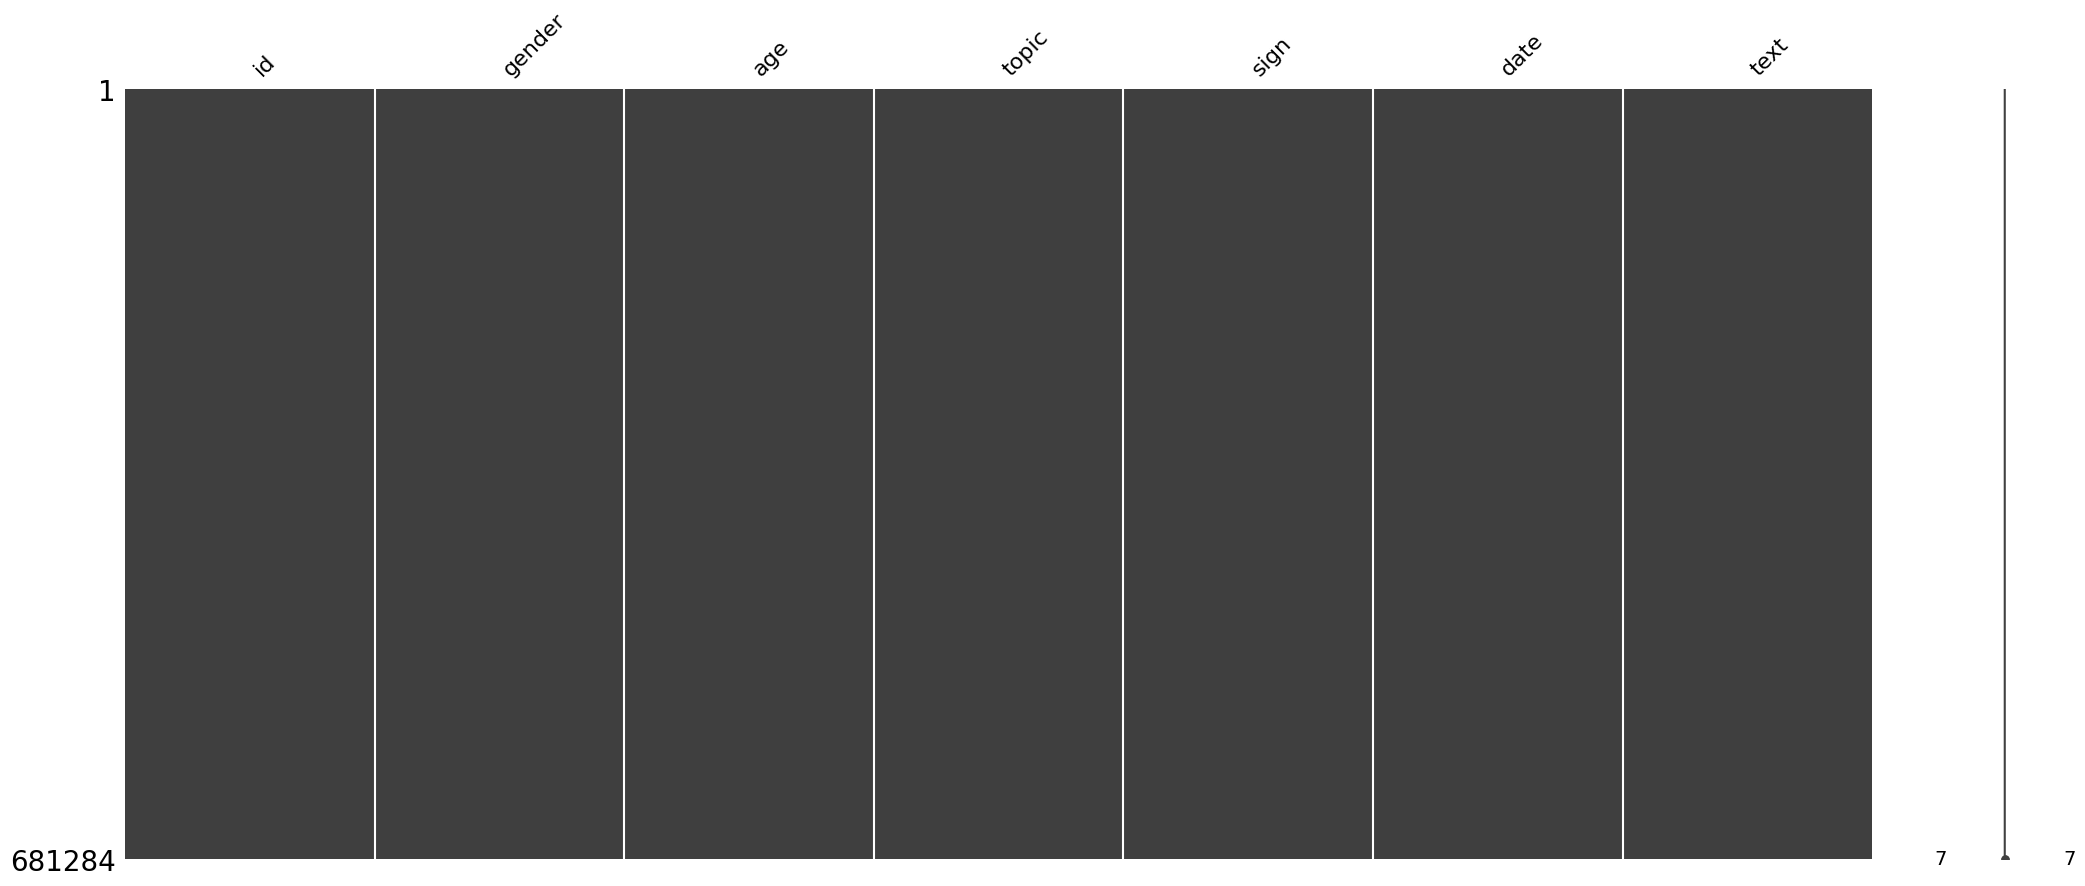

In [ ]:
# B.	Clean the Structured Data 
# i.	Missing value analysis and imputation. 
msno.matrix(df1);

In [ ]:
# i.	Missing value analysis and imputation. 
# For loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 
def remove_nulls(df):
    print('Dataframe shape before removing Nulls:', df.shape)
    print('*' * 50)
    
    filter_cols = df.columns[df.isna().mean() > 0.2]
    print('Number of features with 20%+ Null values:', filter_cols.shape[0])
    print('*' * 50)
    
    for i in filter_cols:
        df.drop(i, axis = 1, inplace = True)
        
    num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
    df[num_cols] = df[num_cols].astype('float')
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    
    print('Dataframe shape after removing Nulls:', df.shape)
    print('*' * 50)
    print('Dataframe 5-point summary:')
    return df.describe().T

In [ ]:
# i.	Missing value analysis and imputation. 
remove_nulls(df1)

Dataframe shape before removing Nulls: (681284, 7)
**************************************************
Number of features with 20%+ Null values: 0
**************************************************
Dataframe shape after removing Nulls: (681284, 7)
**************************************************
Dataframe 5-point summary:


,count,mean,std,min,25%,50%,75%,max
id,681284.0,2.397802e+06,1.247723e+06,5114.0,1239610.0,2607577.0,3525660.0,4337650.0
age,681284.0,2.393233e+01,7.786009e+00,13.0,17.0,24.0,26.0,48.0


#### Note - 

Taking only 100k random records from the dataset to avoid the code execution from crashing due to compute resrictions

In [ ]:
# Create new dataframe
df2 = df1.sample(100000).copy(deep=True)
df2.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",Then I see you standing there Wa...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",Looks like our house (the one we're sel...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",Pics from the BBQ are coming soon...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",Well i havent had the best weeks but fo...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",My Thoughts: This is so cool I can ...


In [ ]:
# ii.	Eliminate Non-English textual data.
def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

# Confirm the changes
print("Dataset shape before cleaning:", df2.shape)

# Apply language detection to filter out non-English text
df2 = df2[df2['text'].apply(is_english)]

# Confirm the changes
print("Updated shape after cleaning:", df2.shape)

Dataset shape before cleaning: (100000, 7)
Updated shape after cleaning: (95683, 7)


## 2.	Preprocess unstructured data to make it consumable for model training

In [ ]:
# Create new dataframe
df3 = df2.copy(deep=True)
df3.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",Then I see you standing there Wa...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",Looks like our house (the one we're sel...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",Pics from the BBQ are coming soon...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",Well i havent had the best weeks but fo...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",My Thoughts: This is so cool I can ...


In [ ]:
# A.	Eliminate All special Characters and Numbers
df3['text'] = df3['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df3.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",Then I see you standing there Wa...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",Looks like our house the one we re sel...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",Pics from the BBQ are coming soon...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",Well i havent had the best weeks but fo...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",My Thoughts This is so cool I can ...


In [ ]:
# B. Lowercase all textual data
df3['text'] = df3['text'].str.lower()
df3.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",then i see you standing there wa...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",looks like our house the one we re sel...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",pics from the bbq are coming soon...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",well i havent had the best weeks but fo...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",my thoughts this is so cool i can ...


In [ ]:
# C. Remove all Stopwords
stop_words = set(stopwords.words('english'))
df3['text'] = df3['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
df3.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",see standing wanting try see standing ever try...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",looks like house one selling going close augus...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",pics bbq coming soon urllink picture urllink j...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",well havent best weeks reason week lot better ...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",thoughts cool say ever want cant jack shit exc...


In [ ]:
# D. Remove all extra white spaces
df3['text'] = df3['text'].str.strip()
df3['text'] = df3['text'].apply(lambda x: re.sub('\s+', ' ', x))
df3.head()

,id,gender,age,topic,sign,date,text
473776,1705067.0,female,27.0,Environment,Pisces,"08,May,2004",see standing wanting try see standing ever try...
32191,1538911.0,female,35.0,indUnk,Libra,"13,July,2004",looks like house one selling going close augus...
376283,3181479.0,male,24.0,Student,Cancer,"08,July,2004",pics bbq coming soon urllink picture urllink j...
182237,1804032.0,female,17.0,indUnk,Libra,"09,November,2003",well havent best weeks reason week lot better ...
220151,3758757.0,male,14.0,Student,Scorpio,"26,June,2004",thoughts cool say ever want cant jack shit exc...


## 3.	Build a base Classification model 

### Base Model on imbalanced dataset

In [ ]:
# A.	Create dependent and independent variables 
X = df3['text']  # Independent variable (input text data)
y = df3['topic']  # Dependent variable (target variable)

In [ ]:
# Check dataframe shape
X.shape, y.shape

((95683,), (95683,))

In [ ]:
# Total individual classes in Target variable
y.nunique()

40

In [ ]:
# Total records for each individual class in Target variable
y.value_counts()

indUnk                     35089
Student                    21406
Technology                  5992
Arts                        4594
Education                   4174
Communications-Media        2939
Internet                    2208
Non-Profit                  2087
Engineering                 1649
Law                         1356
Publishing                  1093
Science                     1065
Government                   918
Consulting                   815
Religion                     725
Marketing                    683
Fashion                      677
Advertising                  666
BusinessServices             648
Accounting                   559
Banking                      550
Telecommunications           543
Chemicals                    515
Military                     466
Museums-Libraries            455
HumanResources               434
RealEstate                   413
Sports-Recreation            381
Transportation               333
Manufacturing                321
Biotech   

In [ ]:
# B. Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76546,)
(76546,)
(19137,)
(19137,)


In [ ]:
# C. Vectorize data using any one vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# D.	Build a base model for Supervised Learning - Classification
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [ ]:
# E. Clearly print Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred)

print(f"Logistic Regression Base Model before Dataset Balancing, Accuracy: {accuracy}")
print(f"Logistic Regression Base Model before Dataset Balancing, Precision: {precision}")
print(f"Logistic Regression Base Model before Dataset Balancing, Recall: {recall}")
#print(f"Logistic Regression Base Model before Dataset Balancing, ROC-AUC: {roc_auc}")

Logistic Regression Base Model before Dataset Balancing, Accuracy: 0.36808277159429376
Logistic Regression Base Model before Dataset Balancing, Precision: 0.15068729062921973
Logistic Regression Base Model before Dataset Balancing, Recall: 0.06599929211717118


#### Note:

We can not print ROC-AUC metric for the target variable, Topic, since it has more than 2 classes, 40 classes here. And printing the ROC-AUC metric for multi-class classification using one-vs-rest approach is time intensive.

#### Observations:

1) The accuracy of the Base LR model in predicting the correct Topic is only 36.80%

2) This could be due to the Topic label being highly imbalanced.

3) To improve the Base model performance, we can use oversampling on the target class to create duplicate and synthetic data, and then take a fixed sample of records for each class in the Target label due to compute resrictions.

### Base Model on balanced dataset

In [ ]:
# Create Dependent and Independent variables
X1 = df3.drop(labels = 'topic' , axis = 1)
y1 = df3['topic']

In [ ]:
# Check Dependent and Independent variables shape
X1.shape, y1.shape

((95628, 6), (95628,))

In [ ]:
# Random Over Smapling for data generation
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state = 42, sampling_strategy = 'minority')
ros = RandomOverSampler(random_state = 42)

#X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1,1), y)
X_resampled, y_resampled = ros.fit_resample(X1, y1)

In [ ]:
# Check Dependent and Independent variables shape
X_resampled.shape, y_resampled.shape

((1410200, 6), (1410200,))

In [ ]:
# Total individual classes in Target variable
y_resampled.nunique()

40

In [ ]:
# Total records for each individual class in Target variable
y_resampled.value_counts()

indUnk                     35255
Student                    35255
InvestmentBanking          35255
Transportation             35255
Religion                   35255
Non-Profit                 35255
Banking                    35255
Science                    35255
Marketing                  35255
Chemicals                  35255
Agriculture                35255
Accounting                 35255
LawEnforcement-Security    35255
Sports-Recreation          35255
Military                   35255
HumanResources             35255
Automotive                 35255
Tourism                    35255
Environment                35255
Museums-Libraries          35255
Consulting                 35255
Manufacturing              35255
Education                  35255
Engineering                35255
Biotech                    35255
Communications-Media       35255
Advertising                35255
Technology                 35255
Publishing                 35255
Law                        35255
Internet  

In [ ]:
# Check Dependent and Independent variables object type
type(X_resampled), type(y_resampled)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
# Create new dataframe
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
# Dataframe sample
df_resampled.sample(5)

,id,gender,age,sign,date,text,topic
764021,3577690.0,male,23.0,Aries,"18,June,2004",urllink microsoft research drm talk sony get p...,Internet
1308163,2311002.0,female,26.0,Sagittarius,"04,Julho,2004",weekend found corner crescent de maisonneuve m...,Telecommunications
208300,3322647.0,female,24.0,Sagittarius,"14,May,2004",guy gets home early work hears strange noises ...,Architecture
241233,1237310.0,male,38.0,Taurus,"15,June,2004",barry lyndon directed stanley kubrick sweeping...,Arts
1192256,3379089.0,male,24.0,Libra,"19,July,2004",widespread notion pasisng death transforms hum...,Religion


In [ ]:
# Total individual classes in Target variable
df_resampled.topic.nunique()

40

In [ ]:
# Total records for each individual class in Target variable
df_resampled.topic.value_counts()

indUnk                     35255
Student                    35255
InvestmentBanking          35255
Transportation             35255
Religion                   35255
Non-Profit                 35255
Banking                    35255
Science                    35255
Marketing                  35255
Chemicals                  35255
Agriculture                35255
Accounting                 35255
LawEnforcement-Security    35255
Sports-Recreation          35255
Military                   35255
HumanResources             35255
Automotive                 35255
Tourism                    35255
Environment                35255
Museums-Libraries          35255
Consulting                 35255
Manufacturing              35255
Education                  35255
Engineering                35255
Biotech                    35255
Communications-Media       35255
Advertising                35255
Technology                 35255
Publishing                 35255
Law                        35255
Internet  

In [ ]:
# Group the dataframe by 'topic' and sample 10,000 records from each group due to compute restrictions
df_resampled_balanced = df_resampled.groupby('topic').apply(lambda x: x.sample(n=2500, random_state=42)).reset_index(drop=True)

In [ ]:
# Dataframe shape
df_resampled_balanced.shape

(100000, 7)

In [ ]:
# Total individual classes in Target variable
df_resampled_balanced.topic.nunique()

40

In [ ]:
# Total records for each individual class in Target variable
df_resampled_balanced.topic.value_counts()

Accounting                 2500
Advertising                2500
LawEnforcement-Security    2500
Manufacturing              2500
Maritime                   2500
Marketing                  2500
Military                   2500
Museums-Libraries          2500
Non-Profit                 2500
Publishing                 2500
RealEstate                 2500
Religion                   2500
Science                    2500
Sports-Recreation          2500
Student                    2500
Technology                 2500
Telecommunications         2500
Tourism                    2500
Transportation             2500
Law                        2500
InvestmentBanking          2500
Internet                   2500
Chemicals                  2500
Agriculture                2500
Architecture               2500
Arts                       2500
Automotive                 2500
Banking                    2500
Biotech                    2500
BusinessServices           2500
Communications-Media       2500
HumanRes

In [ ]:
# Split data into train and test
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(df_resampled_balanced['text'], df_resampled_balanced['topic'], test_size = 0.2, random_state = 42)

In [ ]:
# Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 
print(X_train_bal.shape)
print(y_train_bal.shape)
print(X_test_bal.shape)
print(y_test_bal.shape)

(80000,)
(80000,)
(20000,)
(20000,)


In [ ]:
# Vectorize data using any one vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bal = CountVectorizer()
X_train_vectorized_bal = vectorizer_bal.fit_transform(X_train_bal)
X_test_vectorized_bal = vectorizer_bal.transform(X_test_bal)

In [ ]:
# Build a base model for Supervised Learning - Classification on balanced dataset
from sklearn.linear_model import LogisticRegression

model_bal = LogisticRegression()
model_bal.fit(X_train_vectorized_bal, y_train_bal)

LogisticRegression()

In [ ]:
# E. Clearly print Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_lr = model_bal.predict(X_test_vectorized_bal)
accuracy_lr = accuracy_score(y_test_bal, y_pred_lr)
precision_lr = precision_score(y_test_bal, y_pred_lr, average='macro')
recall_lr = recall_score(y_test_bal, y_pred_lr, average='macro')
#roc_auc_lr = roc_auc_score(y_test_bal, y_pred_lr)

print(f"Logistic Regression Base Model after Dataset Balancing, Accuracy: {accuracy_lr}")
print(f"Logistic Regression Base Model after Dataset Balancing, Precision: {precision_lr}")
print(f"Logistic Regression Base Model after Dataset Balancing, Recall: {recall_lr}")
#print(f"Logistic Regression Base Model after Dataset Balancing, ROC-AUC: {roc_auc_lr}")

Logistic Regression Base Model after Dataset Balancing, Accuracy: 0.80285
Logistic Regression Base Model after Dataset Balancing, Precision: 0.7815535301887515
Logistic Regression Base Model after Dataset Balancing, Recall: 0.8026373654463395


#### Note:

We can not print ROC-AUC metric for the target variable, Topic, since it has more than 2 classes, 40 classes here. And printing the ROC-AUC metric for multi-class classification using one-vs-rest approach is time intensive.

#### Observations:

1) The model performance increased from 36.80% in the base model(imbalanced dataset) to 80.26%, after training the Base LR model on a balanced dataset.

## 4.	Improve Performance of model. 

In [ ]:
# A. Experiment with other vectorizers:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_td = TfidfVectorizer()
X_train_vectorized_td = vectorizer_td.fit_transform(X_train_bal)
X_test_vectorized_td = vectorizer_td.transform(X_test_bal)

In [ ]:
# B. Build classifier models using other algorithms:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(X_train_vectorized_td, y_train_bal)

MultinomialNB()

In [ ]:
# D. Print performance metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_nb = model_NB.predict(X_test_vectorized_td)
accuracy_nb = accuracy_score(y_test_bal, y_pred_nb)
precision_nb = precision_score(y_test_bal, y_pred_nb, average='macro')
recall_nb = recall_score(y_test_bal, y_pred_nb, average='macro')
#roc_auc_nb = roc_auc_score(y_test_bal, y_pred_nb)

print(f"Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Accuracy: {accuracy_nb}")
print(f"Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Precision: {precision_nb}")
print(f"Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Recall: {recall_nb}")
#print(f"Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, ROC-AUC: {roc_auc_nb}")

Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Accuracy: 0.69855
Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Precision: 0.743268692240834
Multinomial Naive Bayes Classifier Base Model after Dataset Balancing, Recall: 0.6988864349434728


Note -

We can not print ROC-AUC metric for the target variable, Topic, since it has more than 2 classes, 40 classes here. And printing the ROC-AUC metric for multi-class classification using one-vs-rest approach is time intensive.


#### Observations:

1) The accuracy of NB Base model on the balanced dataset is 69.8% compared to 80.26% accuracy of the LR Base model.

In [ ]:
# B. Build classifier models using other algorithms:
# Create a Random Forest Classifier object
model_rfc = RandomForestClassifier(n_estimators=2, random_state=42, n_jobs=-1)
model_rfc.fit(X_train_vectorized_td, y_train_bal)

RandomForestClassifier(n_estimators=2, n_jobs=-1, random_state=42)

In [ ]:
# D. Print performance metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_rfc = model_rfc.predict(X_test_vectorized_td)
accuracy_rfc = accuracy_score(y_test_bal, y_pred_rfc)
precision_rfc = precision_score(y_test_bal, y_pred_rfc, average='macro')
recall_rfc = recall_score(y_test_bal, y_pred_rfc, average='macro')
#roc_auc_rfc = roc_auc_score(y_test_bal, y_pred_rfc)

print(f"Random Forest Classifier Base Model after Dataset Balancing, Accuracy: {accuracy_rfc}")
print(f"Random Forest Classifier Base Model after Dataset Balancing, Precision: {precision_rfc}")
print(f"Random Forest Classifier Base Model after Dataset Balancing, Recall: {recall_rfc}")
#print(f"Random Forest Classifier Base Model after Dataset Balancing, ROC-AUC: {roc_auc_rfc}")

Random Forest Classifier Base Model after Dataset Balancing, Accuracy: 0.78355
Random Forest Classifier Base Model after Dataset Balancing, Precision: 0.7520589528831244
Random Forest Classifier Base Model after Dataset Balancing, Recall: 0.7835183129218133


Note - 

We can not print ROC-AUC metric for the target variable, Topic, since it has more than 2 classes, 40 classes here. And printing the ROC-AUC metric for multi-class classification using one-vs-rest approach is time intensive.


#### Observations:

1) The accuracy of RFC Base model on the balanced dataset is 78.35% compared to 80.26% accuracy of the LR Base model.

In [ ]:
'''# C. Tune parameters/hyperparameters:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {
    'n_estimators': [2, 5, 10],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 100]
}

grid_search1 = GridSearchCV(model_rfc, params)
grid_search1.fit(X_train_vectorized_td, y_train_bal)
best_model1 = grid_search1.best_estimator_

In [ ]:
# C. Tune parameters/hyperparameters:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'n_estimators': [2, 5],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(model_rfc, parameters)
grid_search.fit(X_train_vectorized_td, y_train_bal)
best_model = grid_search.best_estimator_

In [ ]:
# Best parameters learned from GridSearch
grid_search.best_estimator_

RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)

In [ ]:
# D. Print performance metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_rfc_ht = best_model.predict(X_test_vectorized_td)
accuracy_rfc_ht = accuracy_score(y_test_bal, y_pred_rfc_ht)
precision_rfc_ht = precision_score(y_test_bal, y_pred_rfc_ht, average='macro')
recall_rfc_ht = recall_score(y_test_bal, y_pred_rfc_ht, average='macro')
#roc_auc_rfc_ht = roc_auc_score(y_test_bal, y_pred_rfc_ht)

print(f"Random Forest Classifier Tuned Model after Dataset Balancing,Accuracy: {accuracy_rfc_ht}")
print(f"Random Forest Classifier Tuned Model after Dataset Balancing,Precision: {precision_rfc_ht}")
print(f"Random Forest Classifier Tuned Model after Dataset Balancing,Recall: {recall_rfc_ht}")
#print(f"Random Forest Classifier Tuned Model after Dataset Balancing,ROC-AUC: {roc_auc_rfc_ht}")

Random Forest Classifier Tuned Model after Dataset Balancing,Accuracy: 0.83525
Random Forest Classifier Tuned Model after Dataset Balancing,Precision: 0.8146679066511275
Random Forest Classifier Tuned Model after Dataset Balancing,Recall: 0.8348878313573934


Note - 

We can not print ROC-AUC metric for the target variable, Topic, since it has more than 2 classes, 40 classes here. And printing the ROC-AUC metric for multi-class classification using one-vs-rest approach is time intensive.

#### Observations:

1) The accuracy of RFC Tuned model on the balanced dataset is 83.48% compared to 80.26% accuracy of the LR Base model.

2) The overall model performances are: LR Base model(balanced dataset) > RFC tuned model(balanced dataset) > RFC Base model(balanced dataset) > NB Base model(balanced dataset) > LR Base model(imbalanced dataset)



## 5.	Share insights on relative performance comparison 


#### A.	Which vectorizer performed better? Probable reason?. 

1) Count Vectorizer performed that TD-IDF vectorizer here, probably since  Count vectorizer provides a straightforward and interpretable representation of text data. 

2) TF-IDF on the other hand, takes into account not only the frequency of terms in a document but also their importance in the entire corpus. It assigns higher weights to terms that are more discriminative and informative for a particular document. With more distinctive training data, TF-IDF would probably perform better.

#### B.	Which model outperformed? Probable reason? 

1) Even the Base Logistic Regression model trained on the balanced dataset delivered the best performance probably due to the model plotting an interpretable and linear decision boundary between the input feature(Text) and the output(Topic).

2) Also, Logistic Regression can effectively handle noise/ irrelavant features by assigning low or zero coefficients to them during the model training process. Naive Bayes and Random Forest, on the other hand, may struggle to handle irrelevant features as they consider all features independently or in combination, respectively, without explicitly weighing their importance.

#### C.	Which parameter/hyperparameter significantly helped to improve performance?Probable reason?

1) By tuning the hyperparameters, specifically the number of estimators(trees) used in the Random Forest, the model's complexity and accuracy improved. 

2) A higher number of estimators allows the Random Forest to capture more diverse patterns and relationships in the dataset. This also allows to reduce the bias/ errors in making the correct predictions.

#### D.	According to you, which performance metric should be given most importance, why?. 

1) When the dataset is imbalanced, Precision and Recall are give better insights since they focus on the correct predictions of the minority class.

2) When the dataset is imbalanced, Accuracy would give the better picture of overall model performance.

3) AUC-ROC score can be useful for binary classification tasks to distinguish between positive and negative classes across different classification thresholds.

## End of Part A

## Part B

• DOMAIN: Customer support
• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.
• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.
• PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]
Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might
require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the
corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer
right questions also increases.
 Reference: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
• Evaluation: Evaluator will use linguistics to twist and turn sentences to ask questions on the topics described in DATA DESCRIPTION and check if
the bot is giving relevant replies.

### Step 1: Data Preprocessing

In [ ]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the corpus
with open('/content/drive/MyDrive/Great_Learning_Repos/00/04_GL_Projects/09_NLP/GL Bot.json') as file:
    corpus = json.load(file)

# Preprocess the data
lemmatizer = WordNetLemmatizer()
intents = corpus['intents']

# Tokenize and lemmatize the patterns and responses
for intent in intents:
    patterns = intent['patterns']
    intent['tokenized_patterns'] = [word_tokenize(pattern.lower()) for pattern in patterns]
    intent['lemmatized_patterns'] = [[lemmatizer.lemmatize(token) for token in pattern] for pattern in intent['tokenized_patterns']]

    responses = intent['responses']
    intent['tokenized_responses'] = [word_tokenize(response) for response in responses]
    intent['lemmatized_responses'] = [[lemmatizer.lemmatize(token) for token in response] for response in intent['tokenized_responses']]

### Step 2: Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Collect patterns and intents
patterns = []
intents_list = []

for intent in intents:
    patterns.extend(intent['lemmatized_patterns'])
    intents_list.extend([intent['tag']] * len(intent['lemmatized_patterns']))

# Vectorize the patterns using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform([' '.join(pattern) for pattern in patterns])

### Step 3: Model Training

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
classifier.fit(features, intents_list)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Step 4: User Interaction

In [ ]:
def preprocess_input(user_input):
    tokenized_input = word_tokenize(user_input.lower())
    lemmatized_input = [lemmatizer.lemmatize(token) for token in tokenized_input]
    return lemmatized_input

import random  
def generate_response(intent_tag):
    for intent in intents:
        if intent['tag'] == intent_tag:
            responses = intent['responses']
            return random.choice(responses)

def start_chat():
    print("Chatbot: Hello! How can I assist you?")
    while True:
        user_input = input("User: ")

        # Preprocess user input
        preprocessed_input = preprocess_input(user_input)

        # Extract features from preprocessed input
        input_features = vectorizer.transform([' '.join(preprocessed_input)])

        # Predict intent using the trained classifier
        predicted_intent = classifier.predict(input_features)[0]

        # Generate and display response
        response = generate_response(predicted_intent)
        print("Chatbot: " + response)

        # End the loop if user requests to exit
        if predicted_intent == 'Exit':
            break

In [ ]:
# Start the chatbot conversation by calling the start_chat() function
start_chat()

Chatbot: Hello! How can I assist you?
User: Hi !!!!!
Chatbot: Hello! how can i help you ?
User: Who ARe yoU ?!
Chatbot: I am your virtual learning assistant
User: What is artificial intelligence ?
Chatbot: https://en.wikipedia.org/wiki/Deep_learning
User: And ML ?
Chatbot: https://en.wikipedia.org/wiki/Machine_learning
User: what the hell
Chatbot: Please use respectful words
User: Sorry, thank you
Chatbot: I hope I was able to assist you, Good Bye


## End of Part B

## End Of Project

In [12]:
# convert colab .ipynb to .html
!jupyter nbconvert --to HTML NLP_Project_1_Statistical_NLP.ipynb
#!jupyter nbconvert NLP_Project_1_Statistical_NLP.ipynb --to slides --post serve

[NbConvertApp] Converting notebook NLP_Project_1_Statistical_NLP.ipynb to HTML
[NbConvertApp] Writing 856924 bytes to NLP_Project_1_Statistical_NLP.html
